
# Final Project Starter

### Models to be Evaluated.

You will train and evaluate different models

- Logistic Regression: Serves as a baseline for performance comparison.
- Random Forest: An ensemble method known for its robustness and ability to handle complex data structures.
- Gradient Boosting Machine (GBM) OR XGBoost: Advanced ensemble techniques known for their predictive power.
- Neural Network: An approximation method known for it’s ability to identify non-linear relationships.
- StackingClassifier or AutoGluon Weighted Ensemble.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -- model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# -- pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler




## Import Data



In [ ]:
loan = pd.read_csv('/content/loan_train.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1076863.0,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1069639.0,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1072053.0,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
loan.loan_status.value_counts(normalize=True)

current    0.849649
default    0.150351
Name: loan_status, dtype: float64

## Features

Here i just select some features to use.

In [ ]:
target = 'loan_status'
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns
#print(numeric_features)
numeric_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee',
       'last_pymnt_amnt']
print(numeric_features)
categorical_features = loan.select_dtypes(include=['object']).columns
#print(categorical_features)
categorical_features = ['grade', 'sub_grade','home_ownership', 'verification_status']
print(categorical_features)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_amnt']
['grade', 'sub_grade', 'home_ownership', 'verification_status']


In [ ]:
loan[target] = loan[target].map({'current': 0, 'default': 1})
loan[target].value_counts()

0    25300
1     4477
Name: loan_status, dtype: int64

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(loan[numeric_features + categorical_features], loan[target], test_size=0.2, random_state=42)


## Generate a pipeline

1. Setup Pipeline
2. Fit the Pipeline

In [ ]:
# create transformers

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# combine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=30, learning_rate=1.0, max_depth=3, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=25, random_state=42)),
    ('nn', MLPClassifier(random_state=42))
]

# final estimator on top
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_classifier)])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_re...
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            n_estimators=30,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(n_estimators=25,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

# Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Predictions for the training set
y_train_pred = pipeline.predict(X_train)
y_train_prob = pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = pipeline.predict(X_test)
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")




Training Metrics:
Accuracy: 0.97
Precision (default): 0.97
Recall (default): 0.84
F1 Score (default): 0.90
AUC: 1.00

Test Metrics:
Accuracy: 0.88
Precision (default): 0.64
Recall (default): 0.37
F1 Score (default): 0.47
AUC: 0.89


# Charts ROC & PR Curves


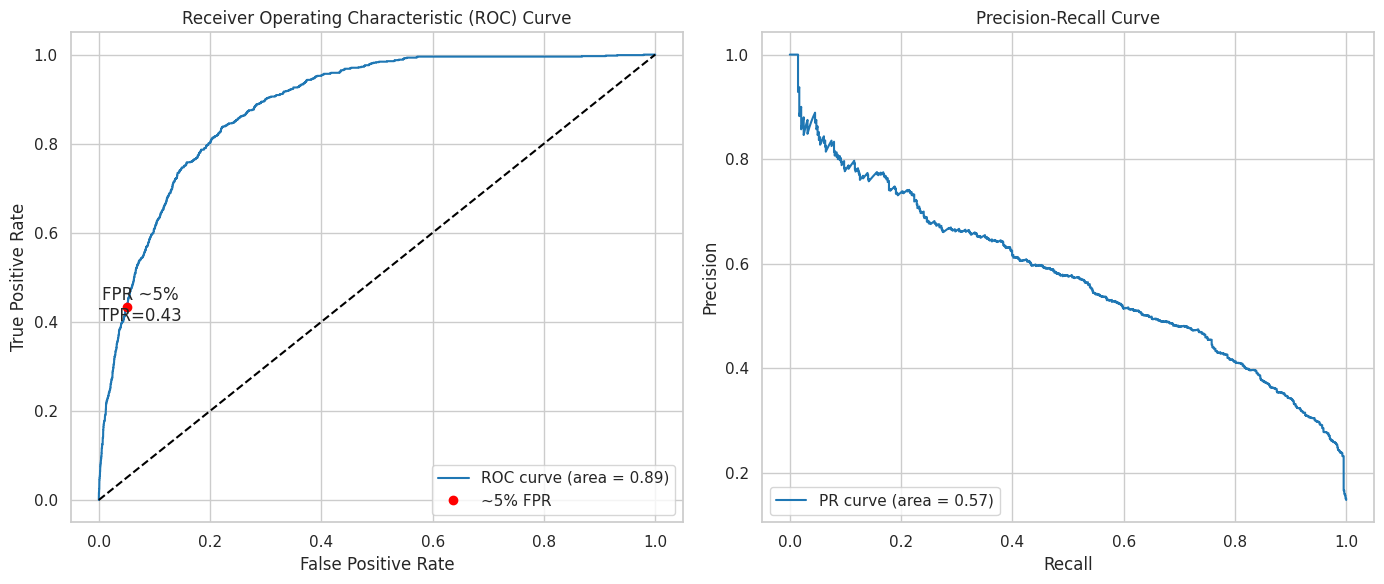

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

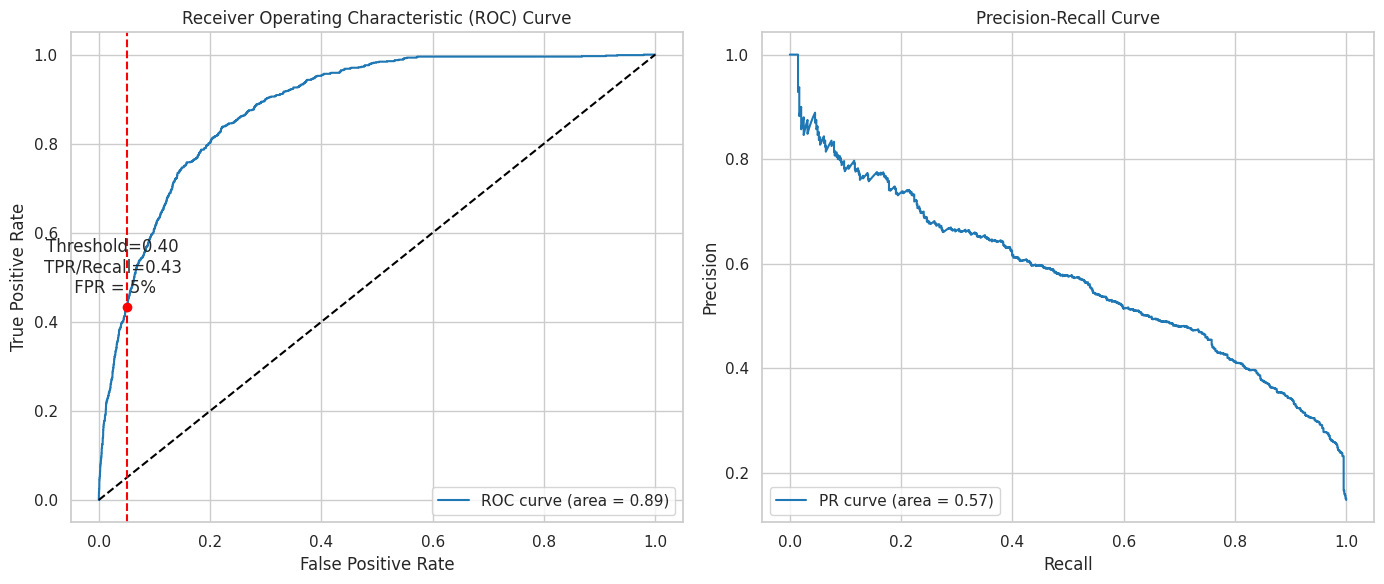

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Assuming calculations for fpr, tpr, and thresholds_roc are already done

plt.figure(figsize=(14, 6))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


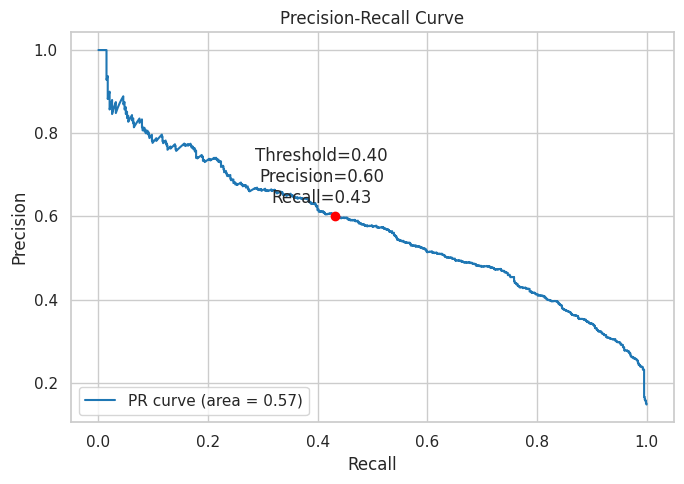

In [ ]:
import numpy as np

# Find the closest threshold in the PR curve to the one identified in the ROC curve analysis
# This might not be exact due to the different metrics, but we find the nearest one
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]

plt.figure(figsize=(7, 5))

# Plot PR Curve
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the selected threshold
plt.plot(selected_recall, selected_precision, 'ro')  # Red dot at the selected threshold
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


## Permutation Importance


In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(pipeline, X_test, y_test,
                                n_repeats=10, random_state=42,
                                n_jobs=-1)


In [ ]:

def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    feature_names = []

    # Loop through each transformer within the ColumnTransformer
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':  # Skip the 'remainder' transformer, if present
            continue
        if isinstance(transformer, Pipeline):
            # If the transformer is a pipeline, get the last transformer from the pipeline
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer has 'get_feature_names_out', use it
            names = list(transformer.get_feature_names_out(columns))
        else:
            # Otherwise, just use the column names directly
            names = list(columns)

        feature_names.extend(names)

    return feature_names

transformed_feature_names = get_feature_names(preprocessor)
transformed_feature_names

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_late_fee',
 'last_pymnt_amnt',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'grade_missing',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_gra

In [ ]:
feature_names = numeric_features + categorical_features

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"Feature {feature_names[i]} "
              f"Mean Importance: {result.importances_mean[i]:.3f} "
              f"+/- {result.importances_std[i]:.3f}")


Feature last_pymnt_amnt Mean Importance: 0.070 +/- 0.003
Feature loan_amnt Mean Importance: 0.021 +/- 0.003
Feature funded_amnt Mean Importance: 0.019 +/- 0.003
Feature total_rec_late_fee Mean Importance: 0.013 +/- 0.001
Feature grade Mean Importance: 0.009 +/- 0.001
Feature funded_amnt_inv Mean Importance: 0.007 +/- 0.001
Feature annual_inc Mean Importance: 0.004 +/- 0.002
Feature installment Mean Importance: 0.003 +/- 0.001
Feature out_prncp_inv Mean Importance: 0.002 +/- 0.000
Feature fico_range_high Mean Importance: 0.002 +/- 0.001
Feature out_prncp Mean Importance: 0.001 +/- 0.000
Feature pub_rec Mean Importance: 0.001 +/- 0.000


In [ ]:



feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Or 'feature_names' if applicable
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False).reset_index(drop=True)
feature_importances_df

,Feature,Importance Mean,Importance Std
0,last_pymnt_amnt,0.069728,0.003471
1,loan_amnt,0.020517,0.002857
2,funded_amnt,0.019208,0.003105
3,total_rec_late_fee,0.013331,0.001054
4,grade,0.008983,0.001433
5,funded_amnt_inv,0.007270,0.001492
6,annual_inc,0.003576,0.001509
7,installment,0.003173,0.001375
8,total_acc,0.002972,0.001506
9,verification_status,0.001864,0.000954


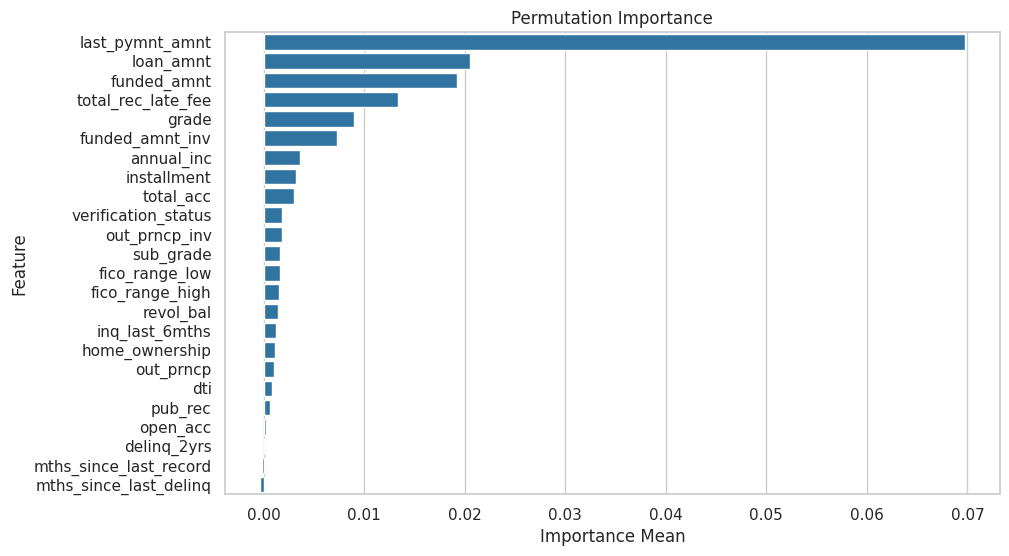

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(feature_importances_df, x='Importance Mean', y='Feature')
plt.title('Permutation Importance')
plt.show()

## Partial Dependance Plot

In [ ]:
# !pip install -U scikit-learn
numeric_features

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_late_fee',
 'last_pymnt_amnt']

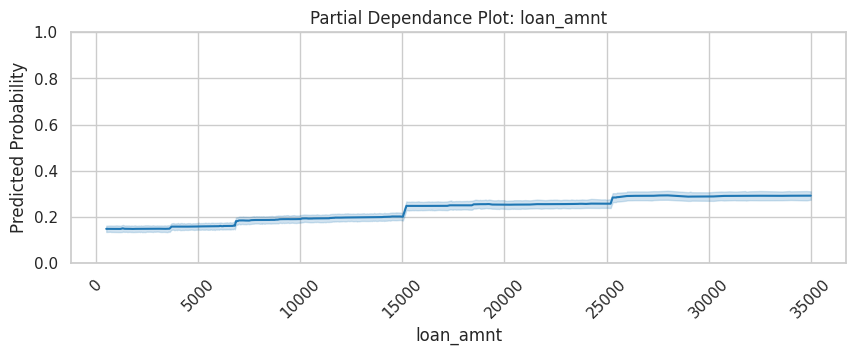

In [ ]:
var = 'loan_amnt'
sample_n = 1000
pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.2).unique(),columns=[var])
pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

pdp_cross = pdp_sample.merge(pdp_values, how='cross')
pdp_cross['pred'] = pipeline.predict_proba(pdp_cross)[:,1]
plt.figure(figsize=(10, 3))
sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
plt.title(f"Partial Dependance Plot: {var}")
plt.ylabel('Predicted Probability')
plt.xticks(rotation=45)
plt.ylim(0.0, 1)
plt.grid(True)
plt.show()

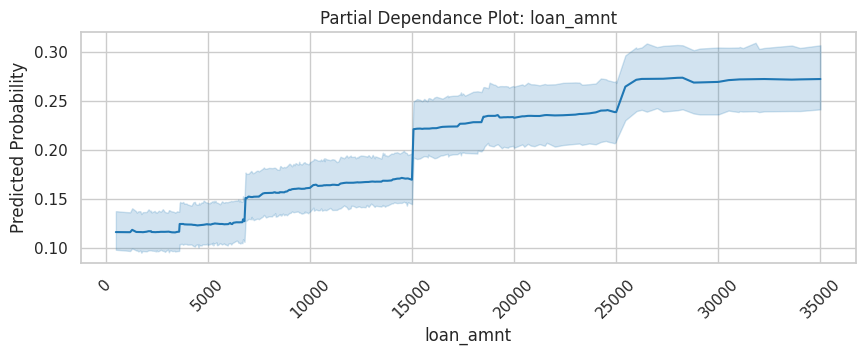

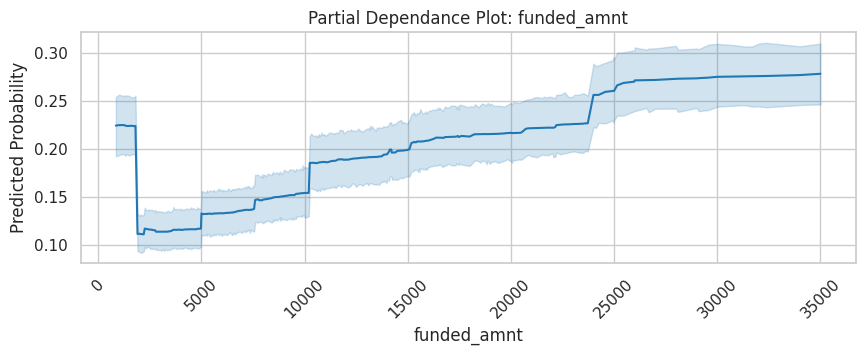

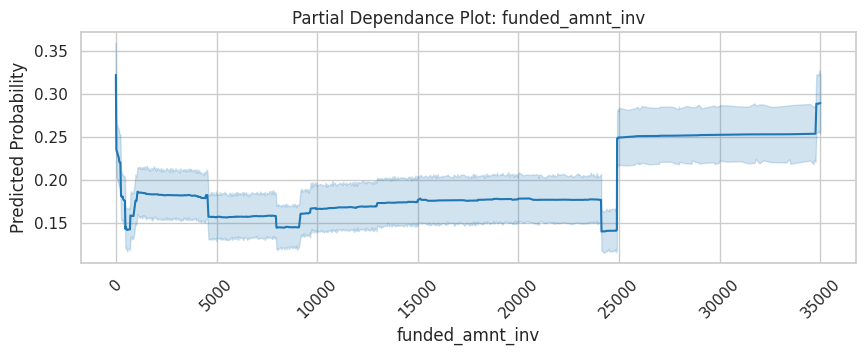

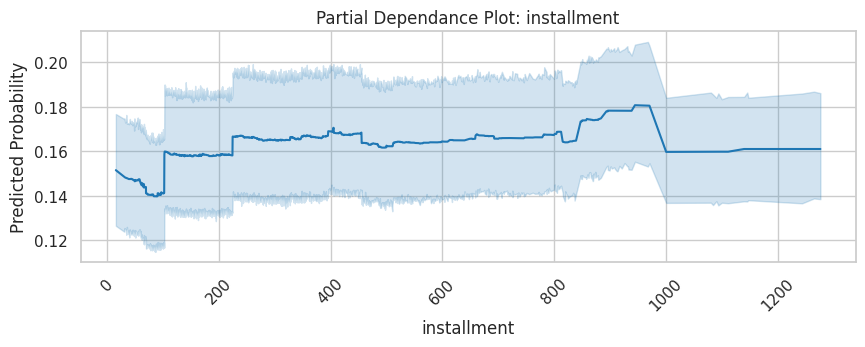

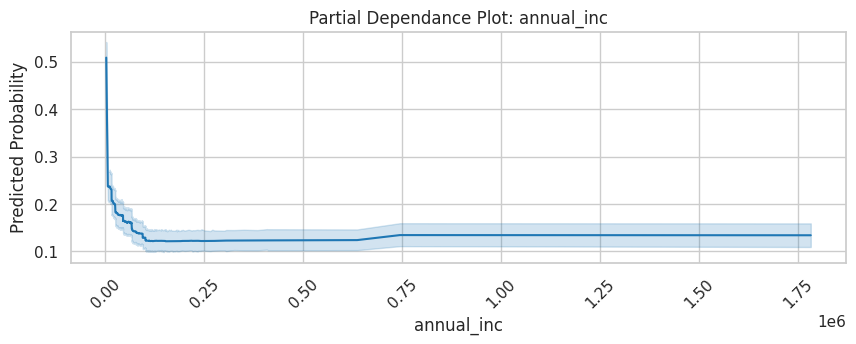

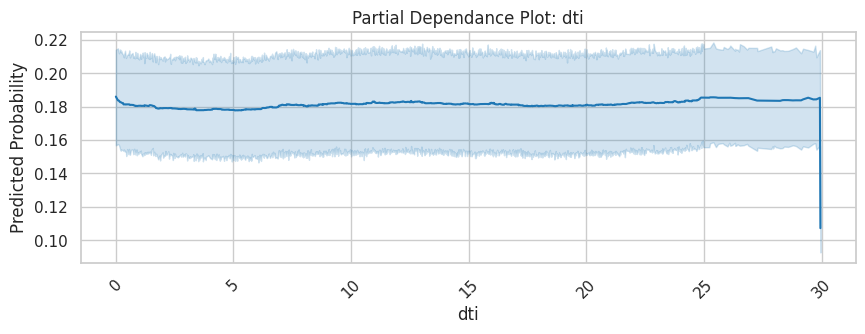

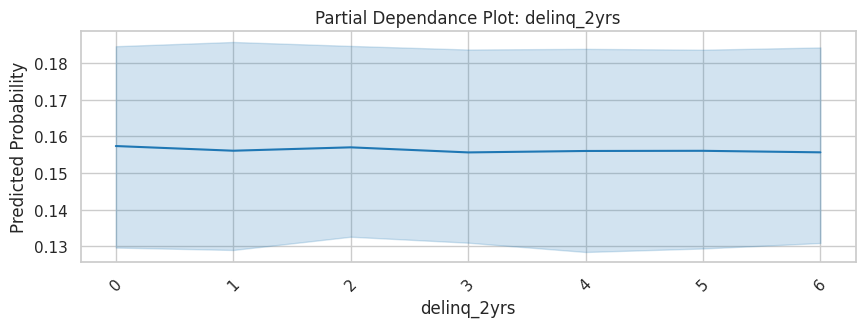

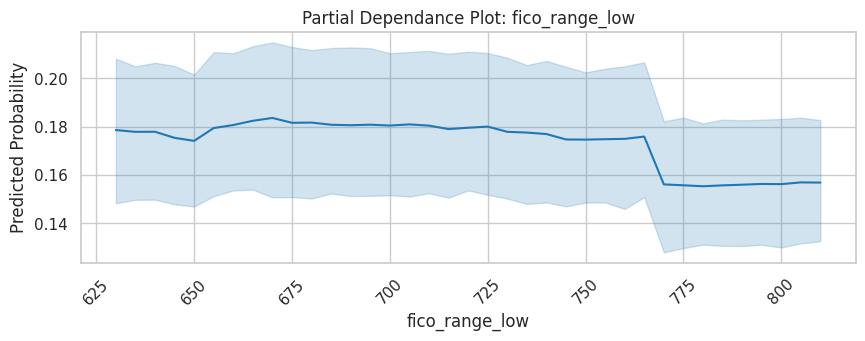

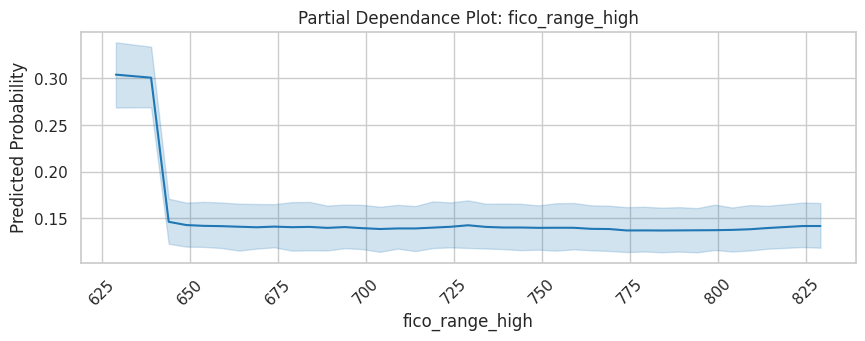

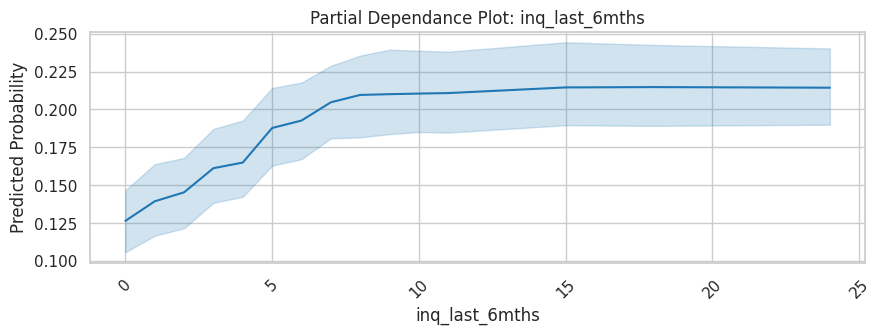

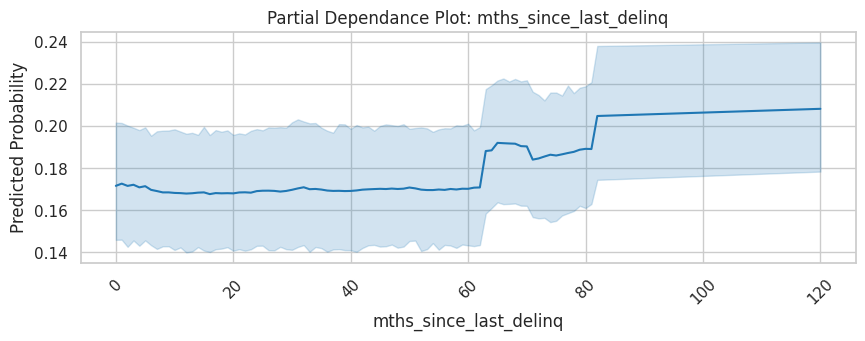

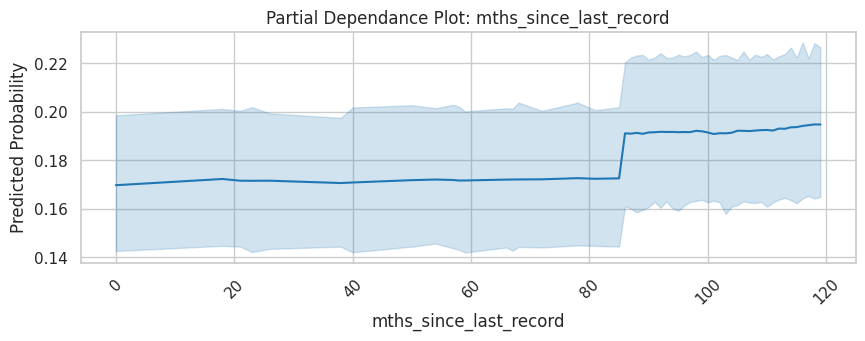

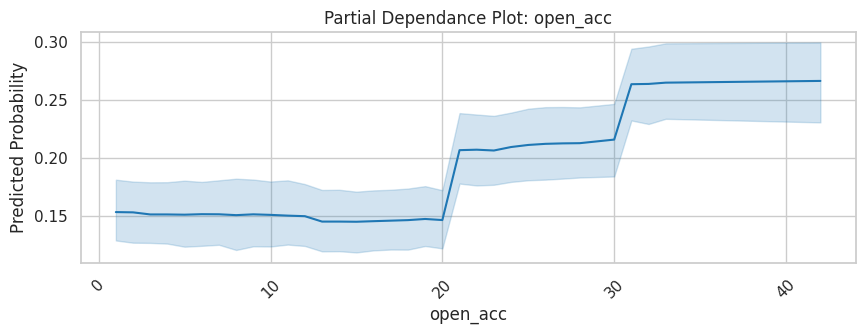

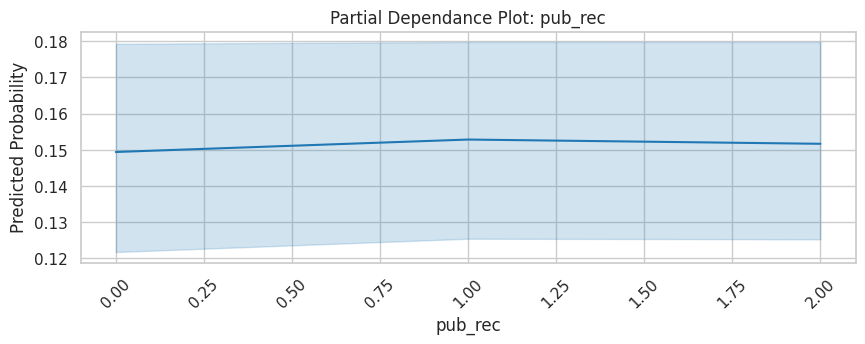

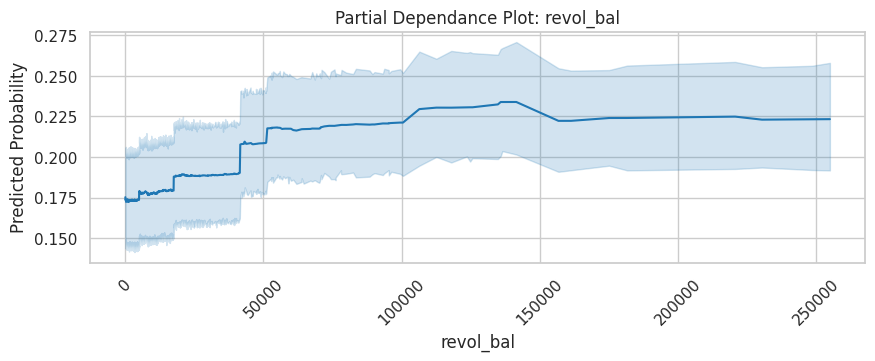

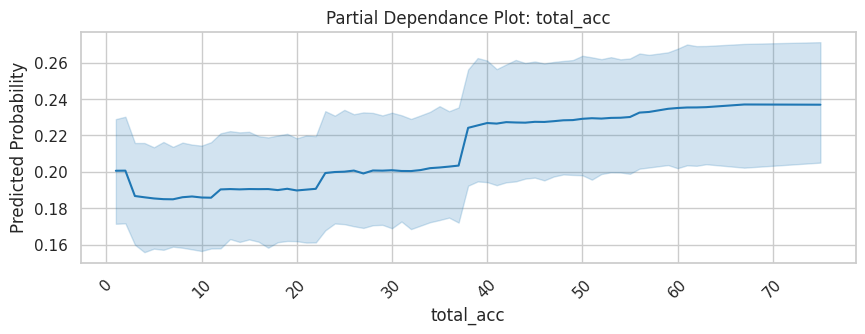

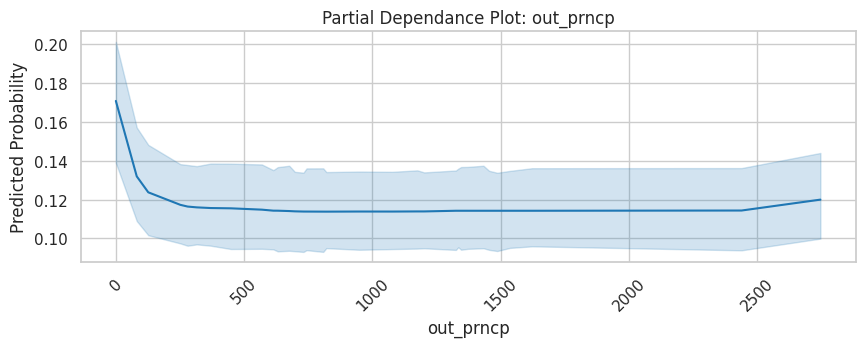

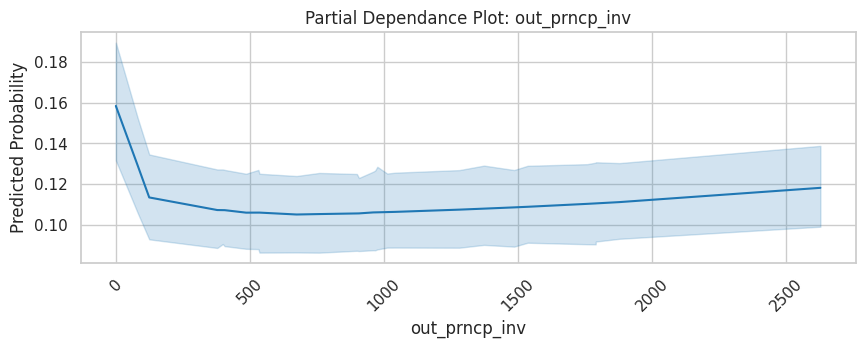

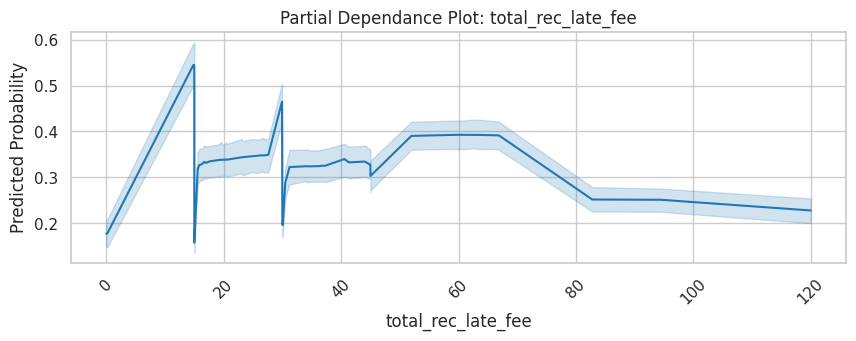

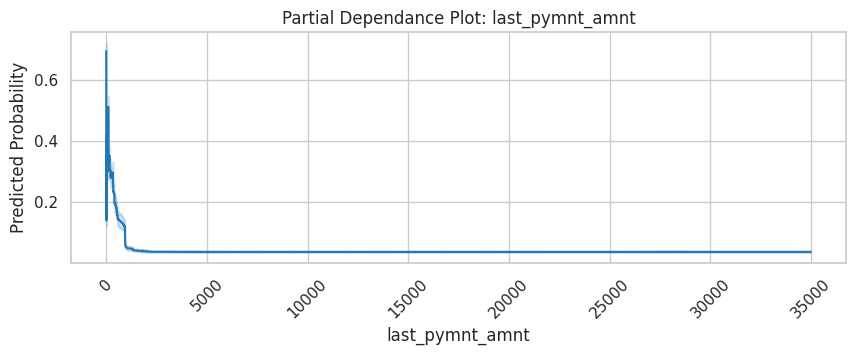

In [ ]:

def pdp_plot_numeric(var, sample_n):
  # var = 'credit_amount'
  pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.1).unique(),columns=[var])
  pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = pipeline.predict_proba(pdp_cross)[:,1]
  plt.figure(figsize=(10, 3))
  sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()

# numeric_features = ['credit_amount', 'duration', 'age']
for var in numeric_features:
  pdp_plot_numeric(var, sample_n=300)

# PDP Categorical

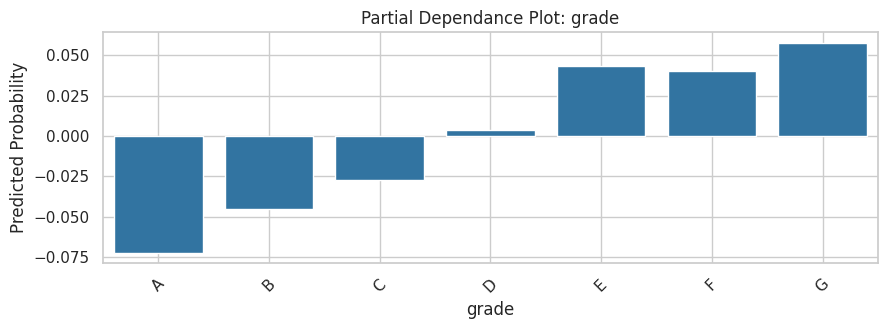

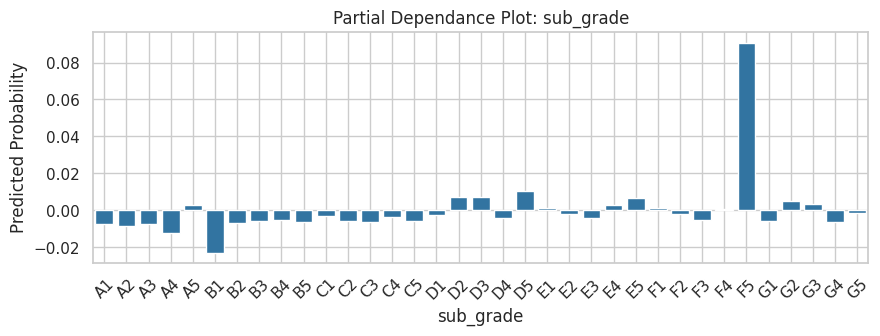

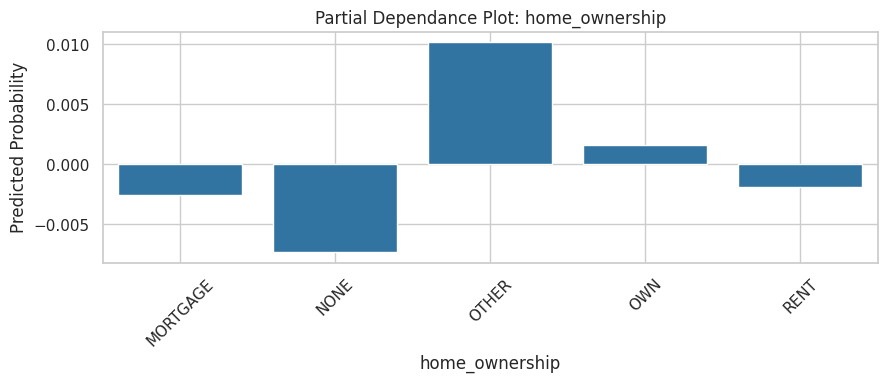

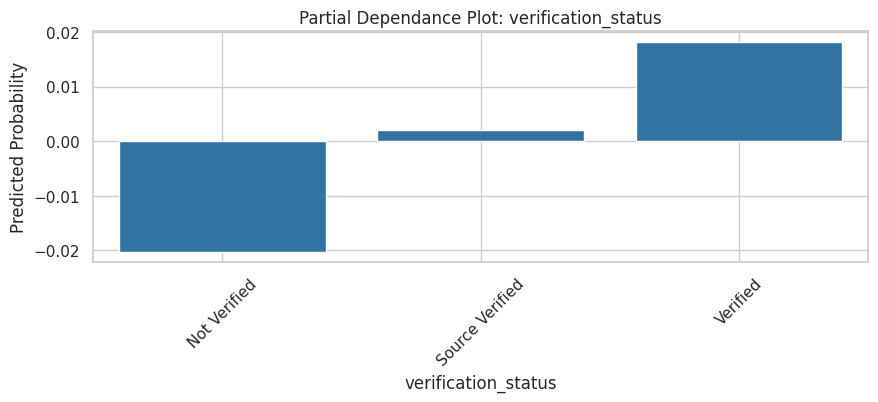

In [ ]:
def pdp_plot_categorical(var, sample_n):
  sns.set_style("whitegrid")  # Try "darkgrid", "ticks", etc.
  sns.set_context("notebook")  # Try "paper", "notebook", "poster" for different sizes

  pdp_values = pd.DataFrame(X_test[var].sort_values().unique(),columns=[var])
  pdp_sample = X_test.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = pipeline.predict_proba(pdp_cross)[:,1]
  mean_pred = pdp_cross['pred'].mean()
  pdp_cross['pred'] = pdp_cross['pred'].apply(lambda x: x - mean_pred)
  plt.figure(figsize=(10, 3))
 #sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  sns.barplot(x=f"{var}", y='pred',
              ci=None,
              data=pdp_cross,
              estimator="mean")
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()


for var in categorical_features:
  pdp_plot_categorical(var, sample_n=100)

In [ ]:
#!pip install dalex

In [ ]:
import dalex as dx # for explanations
pipeline_explainer = dx.Explainer(pipeline, X_test, y_test)
pipeline_explainer

Preparation of a new explainer is initiated

  -> data              : 5956 rows 24 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5956 values
  -> model_class       : sklearn.ensemble._stacking.StackingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7e7384bd5f30> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0316, mean = 0.146, max = 0.967
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.95, mean = 0.00186, max = 0.968
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
model_performance  = pipeline_explainer.model_performance("classification")
model_performance.result

,recall,precision,f1,accuracy,auc
StackingClassifier,0.370034,0.642998,0.469741,0.876427,0.885641


# Variable Importance

In [ ]:
# Calculate feature importance
fi = pipeline_explainer.model_parts(processes=4)

# Plot feature importance
fi.plot()

## PDP

In [ ]:
# Let's say you want to create PDPs for a feature named 'feature_name'
pdp_numeric_profile = pipeline_explainer.model_profile(variables=numeric_features)

# Now, plot the PDP for 'feature_name'
pdp_numeric_profile.plot()

Calculating ceteris paribus: 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]


In [ ]:
pdp_categorical_profile = pipeline_explainer.model_profile(
    variable_type = 'categorical',
    variables=categorical_features)

# Now, plot the PDP for 'feature_name'
pdp_categorical_profile.plot()

Calculating ceteris paribus: 100%|██████████| 4/4 [00:00<00:00,  9.94it/s]


# Local predictions

In [ ]:
X_test['pred']= pipeline.predict(X_test)
X_test['pred_proba']= pipeline.predict_proba(X_test)[:,1]
X_test[target] = y_test
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,out_prncp_inv,total_rec_late_fee,last_pymnt_amnt,grade,sub_grade,home_ownership,verification_status,pred,pred_proba,loan_status
13494,4375.0,4375.0,4225.000000,131.95,17760.0,20.20,0.0,750.0,754.0,0.0,...,0.0,0.0,36.57,A,A1,OWN,Source Verified,0,0.147065,0
21759,10000.0,10000.0,9475.000000,323.85,55000.0,18.59,0.0,715.0,719.0,0.0,...,0.0,0.0,1317.62,B,B2,RENT,Not Verified,0,0.031882,0
11247,24000.0,24000.0,22921.129991,560.56,53000.0,22.42,0.0,740.0,744.0,1.0,...,0.0,0.0,23722.52,C,C5,MORTGAGE,Verified,0,0.037060,0
25028,5550.0,5550.0,5550.000000,189.98,50000.0,21.58,0.0,665.0,669.0,2.0,...,0.0,0.0,202.16,D,D1,MORTGAGE,Not Verified,0,0.268287,0
20440,10000.0,10000.0,9875.000000,232.58,45000.0,5.97,0.0,765.0,769.0,0.0,...,0.0,0.0,232.58,C,C3,RENT,Not Verified,0,0.131503,1


In [ ]:
top_10_tp = (X_test
             .query('loan_status == pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_tp

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,out_prncp_inv,total_rec_late_fee,last_pymnt_amnt,grade,sub_grade,home_ownership,verification_status,pred,pred_proba,loan_status
0,4500.0,4500.0,4500.0,157.44,21600.0,10.83,0.0,670.0,674.0,0.0,...,0.0,14.987723,157.44,D,D4,RENT,Source Verified,1,0.966801,1
1,4000.0,4000.0,4000.0,137.24,16800.0,14.14,1.0,665.0,669.0,0.0,...,0.0,14.945893,105.76,C,C2,RENT,Not Verified,1,0.964963,1
2,18825.0,18825.0,18800.0,472.83,65000.0,11.91,0.0,680.0,684.0,0.0,...,0.0,0.000000,38.00,D,D5,MORTGAGE,Verified,1,0.964846,1
3,8000.0,8000.0,7975.0,201.03,40000.0,14.07,0.0,675.0,679.0,2.0,...,0.0,14.932100,201.03,E,E4,RENT,Source Verified,1,0.964720,1
4,2400.0,2400.0,2400.0,60.86,21600.0,6.00,1.0,675.0,679.0,2.0,...,0.0,14.953171,60.86,E,E5,OWN,Verified,1,0.963821,1
5,2200.0,2200.0,2200.0,70.90,26004.0,14.95,0.0,725.0,729.0,0.0,...,0.0,14.883000,50.00,B,B1,RENT,Verified,1,0.962793,1
6,4000.0,4000.0,3975.0,97.17,26400.0,3.77,1.0,685.0,689.0,0.0,...,0.0,14.896573,97.17,D,D4,RENT,Source Verified,1,0.958444,1
7,3000.0,3000.0,3000.0,107.80,44000.0,0.46,0.0,660.0,664.0,3.0,...,0.0,14.949907,107.80,E,E4,RENT,Not Verified,1,0.957118,1
8,35000.0,35000.0,34975.0,879.47,70000.0,16.32,0.0,710.0,714.0,1.0,...,0.0,0.000000,879.47,E,E4,MORTGAGE,Verified,1,0.956255,1
9,2500.0,2500.0,2500.0,86.17,10000.0,13.44,1.0,675.0,679.0,1.0,...,0.0,14.986074,86.17,D,D1,RENT,Not Verified,1,0.954956,1


In [ ]:
bd_1 = pipeline_explainer.predict_parts(top_10_tp.iloc[0],
                                           type='break_down',
                                           label="record 1")

In [ ]:
bd_1.result

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.146060,0.146060,1.0,28,record 1
1,total_rec_late_fee,14.99,total_rec_late_fee = 14.99,0.531091,0.385032,1.0,27,record 1
2,last_pymnt_amnt,157.4,last_pymnt_amnt = 157.4,0.879285,0.348194,1.0,26,record 1
3,annual_inc,21600.0,annual_inc = 21600.0,0.917575,0.038290,1.0,25,record 1
4,funded_amnt_inv,4500.0,funded_amnt_inv = 4500.0,0.921619,0.004044,1.0,24,record 1
5,grade,D,grade = D,0.938293,0.016674,1.0,23,record 1
6,fico_range_low,670.0,fico_range_low = 670.0,0.943058,0.004765,1.0,22,record 1
7,verification_status,Source Verified,verification_status = Source Verified,0.945698,0.002639,1.0,21,record 1
8,open_acc,3.0,open_acc = 3.0,0.946923,0.001225,1.0,20,record 1
9,fico_range_high,674.0,fico_range_high = 674.0,0.951328,0.004405,1.0,19,record 1


In [ ]:
bd_1.plot()

In [ ]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='break_down',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()


Index: 0, Row: 0.967


Index: 1, Row: 0.965


Index: 2, Row: 0.965


Index: 3, Row: 0.965


Index: 4, Row: 0.964


Index: 5, Row: 0.963


Index: 6, Row: 0.958


Index: 7, Row: 0.957


Index: 8, Row: 0.956


Index: 9, Row: 0.955


# Shap Explainations

In [ ]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='shap',
      B=5,
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

# Break Down Interactions

In [ ]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='break_down_interactions',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()


# Explaining False Negatives
---

In [ ]:
top_10_fn = (X_test
             .query('loan_status != pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=True)
             .head(10)
             .reset_index(drop=True)
)
top_10_fn

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,out_prncp_inv,total_rec_late_fee,last_pymnt_amnt,grade,sub_grade,home_ownership,verification_status,pred,pred_proba,loan_status
0,20000.0,20000.0,17991.544969,421.22,96000.0,0.99,1.0,725.0,729.0,1.0,...,0.0,0.0,4841.69,B,B3,OWN,Source Verified,0,0.031667,1
1,5000.0,5000.0,5000.000000,164.86,37000.0,19.20,0.0,670.0,674.0,0.0,...,0.0,0.0,1763.84,B,B4,RENT,Verified,0,0.031741,1
2,7000.0,7000.0,7000.000000,212.29,46932.0,26.00,0.0,750.0,754.0,3.0,...,0.0,0.0,2300.00,A,A2,OWN,Verified,0,0.031783,1
3,16000.0,16000.0,15900.000000,385.53,78000.0,8.57,0.0,700.0,704.0,1.0,...,0.0,0.0,10021.06,D,D3,MORTGAGE,Verified,0,0.031858,1
4,6500.0,6500.0,6475.000000,199.34,64800.0,8.48,0.0,730.0,734.0,0.0,...,0.0,0.0,199.34,A,A4,MORTGAGE,Source Verified,0,0.038074,1
5,35000.0,35000.0,20775.004916,858.59,115000.0,6.47,0.0,745.0,749.0,1.0,...,0.0,0.0,11800.00,E,E1,MORTGAGE,Verified,0,0.038178,1
6,8300.0,8300.0,8300.000000,263.56,30000.0,3.80,0.0,715.0,719.0,0.0,...,0.0,0.0,527.12,A,A5,RENT,Not Verified,0,0.040434,1
7,14000.0,14000.0,14000.000000,438.07,45600.0,19.74,0.0,740.0,744.0,0.0,...,0.0,0.0,438.07,A,A4,OWN,Not Verified,0,0.041361,1
8,33425.0,20675.0,19010.821218,475.63,75000.0,25.71,0.0,745.0,749.0,3.0,...,0.0,0.0,1370.08,C,C1,MORTGAGE,Source Verified,0,0.041689,1
9,23000.0,23000.0,23000.000000,701.48,98000.0,20.85,0.0,780.0,784.0,0.0,...,0.0,0.0,701.48,A,A3,MORTGAGE,Verified,0,0.041842,1


Shap FN


In [ ]:
for index, row in top_10_fn.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fn.iloc[index],
      type='shap',
      B=5,
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()